🔒 Encrypted Image:


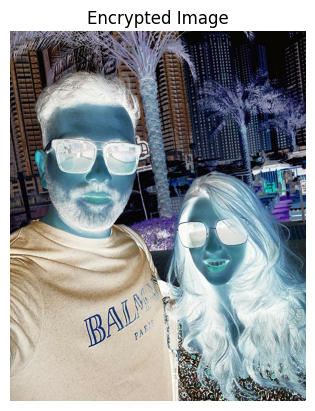

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from PIL import Image
import numpy as np
import io
import matplotlib.pyplot as plt
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output

# Global variables
uploaded_image = None
image_np = None
processed_image = None
file_name = None

# UI Buttons
encrypt_btn = widgets.Button(description="🔒 Encrypt Image")
decrypt_btn = widgets.Button(description="🔓 Decrypt Image")
download_btn = widgets.Button(description="⬇️ Download Image", disabled=True)
upload_btn = widgets.Button(description="⬆️ Upload Another Image")

def show_image(img, title="Image"):
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

def on_upload():
    clear_output()
    print("Upload an image to encrypt or decrypt:")
    uploaded = files.upload()
    if uploaded:
        global uploaded_image, image_np, file_name, processed_image
        file_name = next(iter(uploaded))
        uploaded_image = Image.open(io.BytesIO(uploaded[file_name])).convert("RGB")
        image_np = np.array(uploaded_image)
        processed_image = None
        download_btn.disabled = True
        clear_output()
        print("✅ Image uploaded successfully.")
        show_image(uploaded_image, title="Original Image")
        display(ui)

def on_encrypt_clicked(b):
    global image_np, processed_image
    if image_np is None:
        print("❌ No image to encrypt.")
        return
    encrypted_np = 255 - image_np
    processed_image = Image.fromarray(encrypted_np.astype('uint8'))
    clear_output()
    print("🔒 Encrypted Image:")
    show_image(processed_image, title="Encrypted Image")
    download_btn.disabled = False
    display(ui)

def on_decrypt_clicked(b):
    global image_np, processed_image
    if image_np is None:
        print("❌ No image to decrypt.")
        return
    decrypted_np = 255 - image_np
    processed_image = Image.fromarray(decrypted_np.astype('uint8'))
    clear_output()
    print("🔓 Decrypted Image:")
    show_image(processed_image, title="Decrypted Image")
    download_btn.disabled = False
    display(ui)

def on_download_clicked(b):
    if processed_image is not None:
        processed_image.save("processed_image.png")
        files.download("processed_image.png")
    else:
        print("❌ No image to download.")

def on_upload_clicked(b):
    on_upload()

# Attach events
encrypt_btn.on_click(on_encrypt_clicked)
decrypt_btn.on_click(on_decrypt_clicked)
download_btn.on_click(on_download_clicked)
upload_btn.on_click(on_upload_clicked)

# Arrange UI
ui = widgets.VBox([encrypt_btn, decrypt_btn, download_btn, upload_btn])

# Initial trigger
on_upload()
